# Load the Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/Users/snehithjaggari/Desktop/ESG_Project/data/company_esg_financial_dataset.csv")

# Initial inspection
df.head()


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


# Data Cleaning & Validation

In [8]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Handle missing values (numeric)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove duplicate rows if any
df = df.drop_duplicates()


# ESG Score

In [11]:
df['ESG_Score_Calculated'] = (
    df['ESG_Environmental'] +
    df['ESG_Social'] +
    df['ESG_Governance']
) / 3


In [13]:
df['ESG_Score_Calculated'].describe()


count    11000.000000
mean        54.615076
std         15.894207
min          6.300000
25%         44.133333
50%         54.566667
75%         65.600000
max         98.766667
Name: ESG_Score_Calculated, dtype: float64

In [14]:
df[['ESG_Overall', 'ESG_Score_Calculated']].head(10)


,ESG_Overall,ESG_Score_Calculated
0,57.0,57.000000
1,56.7,56.733333
2,56.5,56.466667
3,58.0,58.000000
4,56.6,56.600000
5,55.7,55.700000
6,55.6,55.633333
7,57.7,57.666667
8,57.8,57.800000
9,58.5,58.533333


# Risk Flag Creation

In [16]:
df['ESG_Risk_Flag'] = pd.cut(
    df['ESG_Score_Calculated'],
    bins=[0, 40, 70, 100],
    labels=['High Risk', 'Medium Risk', 'Low Risk']
)

df['ESG_Risk_Flag'].value_counts()


Medium Risk    7084
High Risk      1996
Low Risk       1920
Name: ESG_Risk_Flag, dtype: int64

# Correlation with Financial KPIs

In [18]:
corr_cols = [
    'ESG_Score_Calculated',
    'Revenue',
    'ProfitMargin',
    'MarketCap',
    'GrowthRate'
]

df[corr_cols].corr()


,ESG_Score_Calculated,Revenue,ProfitMargin,MarketCap,GrowthRate
ESG_Score_Calculated,1.000000,0.148919,0.087974,0.143835,0.064827
Revenue,0.148919,1.000000,0.132488,0.836884,0.162354
ProfitMargin,0.087974,0.132488,1.000000,0.259927,0.058999
MarketCap,0.143835,0.836884,0.259927,1.000000,0.127677
GrowthRate,0.064827,0.162354,0.058999,0.127677,1.000000


In [19]:
df.groupby('ESG_Risk_Flag')[['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']].mean()


,Revenue,ProfitMargin,MarketCap,GrowthRate
ESG_Risk_Flag,,,,
High Risk,2859.458868,10.705611,7194.362325,3.835671
Medium Risk,4442.039243,10.472516,12098.998363,4.857566
Low Risk,7398.161771,12.681927,24540.413021,5.800365


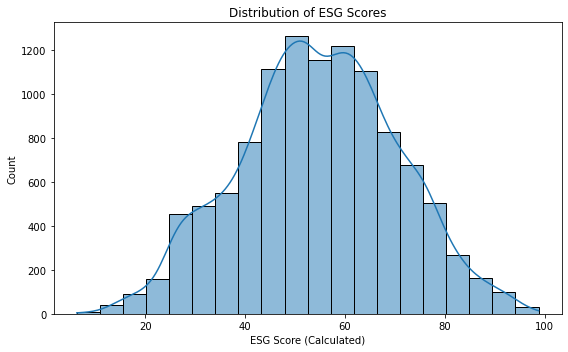

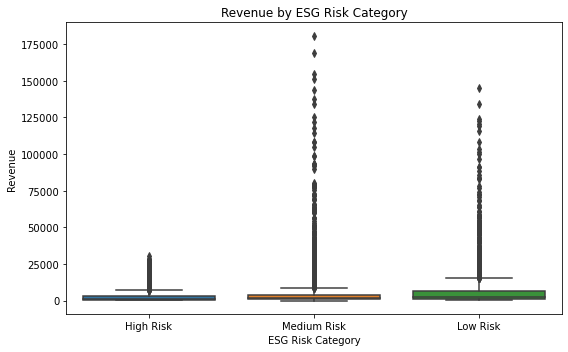

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure outputs directory exists
os.makedirs("../outputs", exist_ok=True)

# 1️⃣ ESG Score Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['ESG_Score_Calculated'], bins=20, kde=True)
plt.title("Distribution of ESG Scores")
plt.xlabel("ESG Score (Calculated)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../outputs/esg_score_distribution.png")
plt.show()

# 2️⃣ Revenue by ESG Risk Category
plt.figure(figsize=(8,5))
sns.boxplot(x='ESG_Risk_Flag', y='Revenue', data=df)
plt.title("Revenue by ESG Risk Category")
plt.xlabel("ESG Risk Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("../outputs/revenue_by_esg_risk.png")
plt.show()
